In [1]:
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.datasets import fetch_lfw_people
import matplotlib.pyplot as plt
import numpy as np
from keras.utils import to_categorical
from keras import models
from keras import layers


lfw_people = fetch_lfw_people(min_faces_per_person=70,  download_if_missing = True, resize=1, color=False)
n_samples, h, w = lfw_people.images.shape

X = lfw_people.data
Y = lfw_people.target

print(n_samples,h,w)

x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.33, random_state=47)

Using TensorFlow backend.


1288 125 94


(862, 11750)
(862,)
(426, 11750)
(426,)


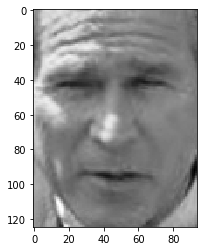

array([3, 6, 5, 3, 3, 3, 3, 3, 3, 3, 3, 3, 6, 4, 4, 1, 3, 3, 3, 5, 1, 6,
       1, 1, 3, 1, 1, 6, 3, 3, 2, 3, 3, 0, 3, 1, 3, 3, 4, 3, 5, 3, 4, 3,
       0, 4, 1, 3, 1, 5, 3, 3, 0, 3, 3, 5, 1, 2, 4, 0, 1, 3, 1, 1, 1, 6,
       5, 1, 1, 0, 6, 2, 1, 2, 3, 3, 6, 3, 2, 5, 3, 1, 1, 3, 0, 3, 3, 2,
       3, 0, 4, 3, 3, 2, 3, 3, 3, 1, 2, 6, 3, 2, 3, 3, 3, 3, 1, 3, 4, 4,
       3, 2, 3, 1, 3, 3, 3, 2, 4, 5, 6, 3, 1, 3, 1, 0, 3, 1, 2, 3, 6, 1,
       1, 1, 4, 6, 3, 3, 1, 5, 6, 3, 3, 3, 5, 3, 3, 3, 6, 3, 2, 3, 1, 6,
       3, 1, 3, 3, 3, 2, 3, 3, 1, 3, 3, 3, 1, 5, 2, 5, 3, 6, 1, 4, 3, 3,
       3, 4, 3, 1, 6, 6, 5, 1, 3, 0, 3, 3, 3, 3, 3, 3, 0, 1, 1, 3, 1, 3,
       0, 3, 1, 4, 2, 5, 3, 3, 0, 3, 1, 3, 3, 1, 6, 1, 1, 6, 0, 3, 3, 0,
       3, 6, 4, 5, 1, 6, 3, 3, 2, 3, 0, 1, 1, 3, 3, 0, 3, 3, 4, 3, 6, 5,
       0, 4, 2, 6, 4, 1, 1, 4, 4, 0, 1, 3, 3, 3, 3, 4, 3, 1, 1, 3, 3, 1,
       1, 3, 2, 2, 3, 3, 1, 2, 3, 3, 2, 3, 6, 3, 2, 1, 6, 3, 1, 3, 3, 5,
       2, 2, 3, 3, 1, 6, 0, 3, 0, 2, 3, 2, 1, 0, 3,

In [2]:
print(x_train.shape)
print(y_train.shape)

print(x_test.shape)
print(y_test.shape)

x_train = x_train.reshape(x_train.shape[0],h,w,1)
x_train = x_train.astype('float32')
x_train = x_train/255

x_test = x_test.reshape(x_test.shape[0],h,w,1)
x_test = x_test.astype('float32')
x_test = x_test/255

x,y,r = x_test[5].shape
plt.imshow(x_test[5].reshape(x,y), cmap='gray')
plt.show()
y_test

In [3]:
classes = {
  0: 'target0',
    1: 'target1',
    2: 'target2',
    3: 'target3',
    4: 'target4',
    5: 'target5',
    6: 'target6'
}

num_classes = len(classes)
y_train = to_categorical(y_train,num_classes)
y_test = to_categorical(y_test,num_classes)
y_test

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 1., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [4]:
model = models.Sequential()

model.add(layers.Conv2D(32, (3,3), activation='relu',input_shape=(125, 94, 1)))
model.add(layers.MaxPool2D((2,2)))
model.add(layers.Conv2D(64,(3,3),activation='relu')) 
model.add(layers.MaxPool2D((2,2)))
model.add(layers.Conv2D(64,(3,3),activation='relu'))
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(7, activation='softmax')) 

model.summary()

model.compile(loss='categorical_crossentropy',
             optimizer='rmsprop',
             metrics=['accuracy'],
             )
model.fit(x_train,
         y_train,
         epochs=8,
         verbose=True,
         batch_size=64,
         validation_split=0.1)

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 123, 92, 32)       320       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 61, 46, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 59, 44, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 29, 22, 64)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 27, 20, 64)        36928     
_________________________________________________________________
flatten_1 (Flatten)          (None, 34560)             0         
_________________________________________________________________
dense_1 (Dense)              (None, 64)               

In [5]:
val_loss, val_acc = model.evaluate(x_test, y_test) #Calculate validation loss and validation accuracy
print('Val_acc:', val_acc) 

426/426 [==============================] - 1s 2ms/step
Val_acc: 0.6384976506233215


In [6]:
model.save('self-trained models/Convolutional_network.model')

In [7]:
new_model = tf.keras.models.load_model('self-trained models/Convolutional_network.model')

In [8]:
predictions = new_model.predict(x_test)

In [9]:
pred = np.argmax(predictions[0])

print('Index prediction:', pred)
print('Class prediction:', classes[pred])

Index prediction: 3
Class prediction: target3


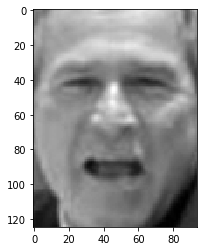

Actual index: 3
One-hot value: 1.0
Actual Class: target3


In [10]:
x,y,_ = x_test[0].shape
plt.imshow(x_test[0].reshape(x,y), cmap='gray')
plt.show()

index, value = max(enumerate(y_test[0]), key=lambda e: e[1])
print('Actual index:', index)
print('One-hot value:', value)
print('Actual Class:', classes[index])